# **Work done and lessons learned**

##*1. Acquisition of basic knowledge*

### *1.1 Electrocardiogram(ECG)*

In order to understand the basic functioning of an Electrocardiogram(ECG), I have found and watch a Youtube video  called ELECTROCARDIOGRAMA - Tutorial by Alberto Sanagustín

(https://www.youtube.com/watch?v=SLe281LBBRU&ab_channel=AlbertoSanagust%C3%ADn) 



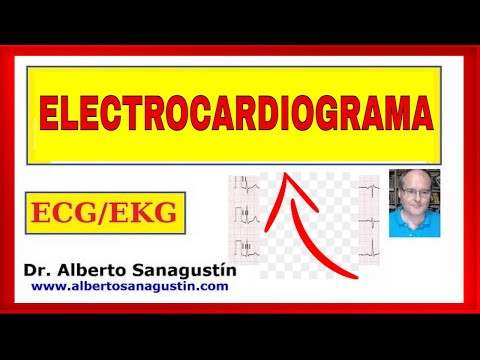

In [ ]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('SLe281LBBRU')

In this video, I have learned about: Physiological bases, electrical activity, leads, waves, segments and intervals... of the normal ECG/EKG and part of the pathological one.

Furthermore, I took a look at this document because I found it interesting and more in line with the company's purpose:

Strodthoff, N., Wagner, P., Schaeffter, T., Samek, W. (2021). "Deep Learning for ECG Analysis: Benchmarks and Insights from PTB-XL". IEEE Journal of Biomedical and Health Informatics 25, no. 5, 1519-1528.

 https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9190034

###*1.2 Pandas library*

As I had no experience with the *pandas* library, this has been my first contact with this essential in the world of data engineering.

I have trained myself by watching videos on youtube and examples from the *pandas* official website.

(https://pandas.pydata.org/docs/index.html)

(https://www.youtube.com/watch?v=PvNKKrPE0AI&ab_channel=Errodringer)

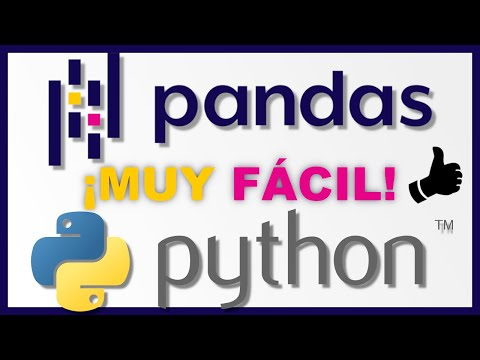

In [ ]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('PvNKKrPE0AI')

###*1.3 Jupyter Notebook*

My experience in developing python code has been in Pycharm and Spyder, so this has also been my first contact with a remote interactive environment.

(https://www.youtube.com/watch?v=uoWDS0JwqE4&ab_channel=DiegoEfe)

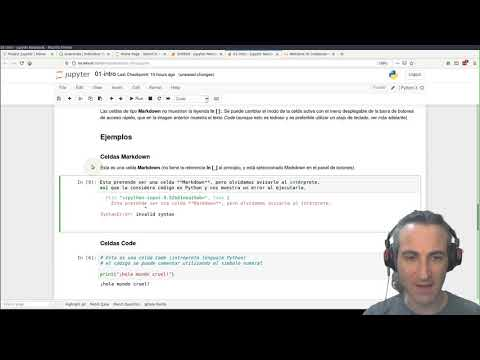

In [ ]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('uoWDS0JwqE4')

### *1.4 Dataset*

Once I understood what I was dealing with, I downloaded the datasets and did further research on the format in which they were presented.

First of all, there is an extended explanation on the official *physionet* website:

(https://physionet.org/content/ptb-xl/1.0.2/) 

But I still have to deal with understanding the Waveform Database Software Package (WFDB) format. Therefore, I looked for clarification on the following websites:

(https://physionet.org/content/wfdb-python/4.0.0/)
(https://wfdb.readthedocs.io/en/latest/index.html)

Then it was time to put theory into practice, so on the Jupyter Notebook **cheat_sheet.ipynb** are the different tests I have done.

##*2. Taks*

###*2.1 Read the ECG files and corresponding annotations*

In [1]:
import numpy as np
import pandas as pd
import os
import wfdb
cwd = os.getcwd() #Current working directory
path = cwd + '/data/physionet.org/files/ptb-xl/1.0.2/' # path to the csv files

## Save the database into a pandas DataFrame
ptbxl_ecg_database = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')

## Pass the data from the wfdb format to python list and then to numpy ndarray
data = [wfdb.rdsamp(path+f) for f in ptbxl_ecg_database.filename_lr] 

data= np.asarray(data)

/tmp/ipykernel_5362/2065613269.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data= np.asarray(data)


In [2]:
## Separate the signals from the metadata
signals = np.asarray([i for i in data[:,0]])
metas = np.asarray([i for i in data[:,1]])

In [3]:
## See hoow they are structured
print(signals) # It seems like each row has the 12-lead ECG records at a timestamp 
print(metas) # The 'sig_name' elements just confirmed my first assumption and also shows the order of the 12-lead ECG records 

[{'fs': 100, 'sig_len': 1000, 'n_sig': 12, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'comments': []}
 {'fs': 100, 'sig_len': 1000, 'n_sig': 12, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'comments': []}
 {'fs': 100, 'sig_len': 1000, 'n_sig': 12, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'comments': []}
 ...
 {'fs': 100, 'sig_len': 1000, 'n_sig': 12, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['I', 'II', 

### *2.2 Plot the signal in appropriate manner to be read by a doctor*

In [9]:
ind_signals = [1,8] # I chose these two records randomly
some_signals = signals[ind_signals,:,:]
some_signals.shape

(2, 1000, 12)

In [10]:
sig_names=metas[0]['sig_name'] #Extract the names of the 12-lead ECG records 
sig_names 

['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

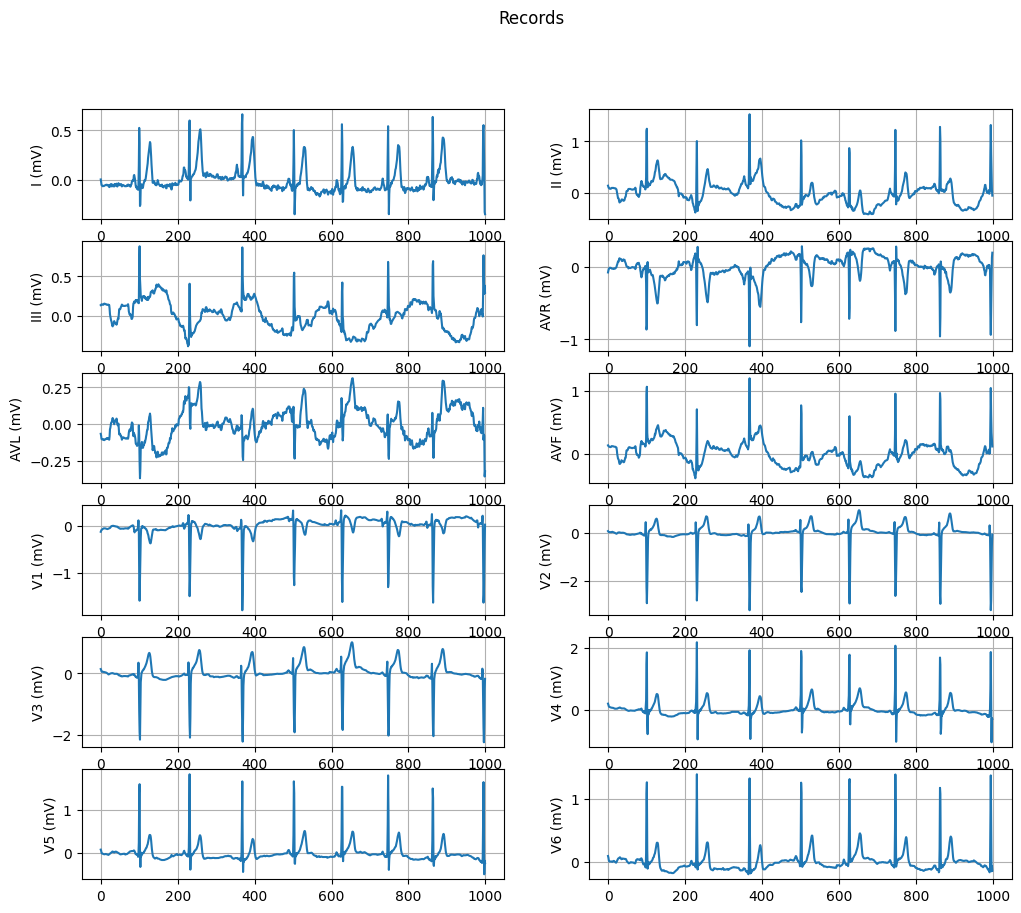

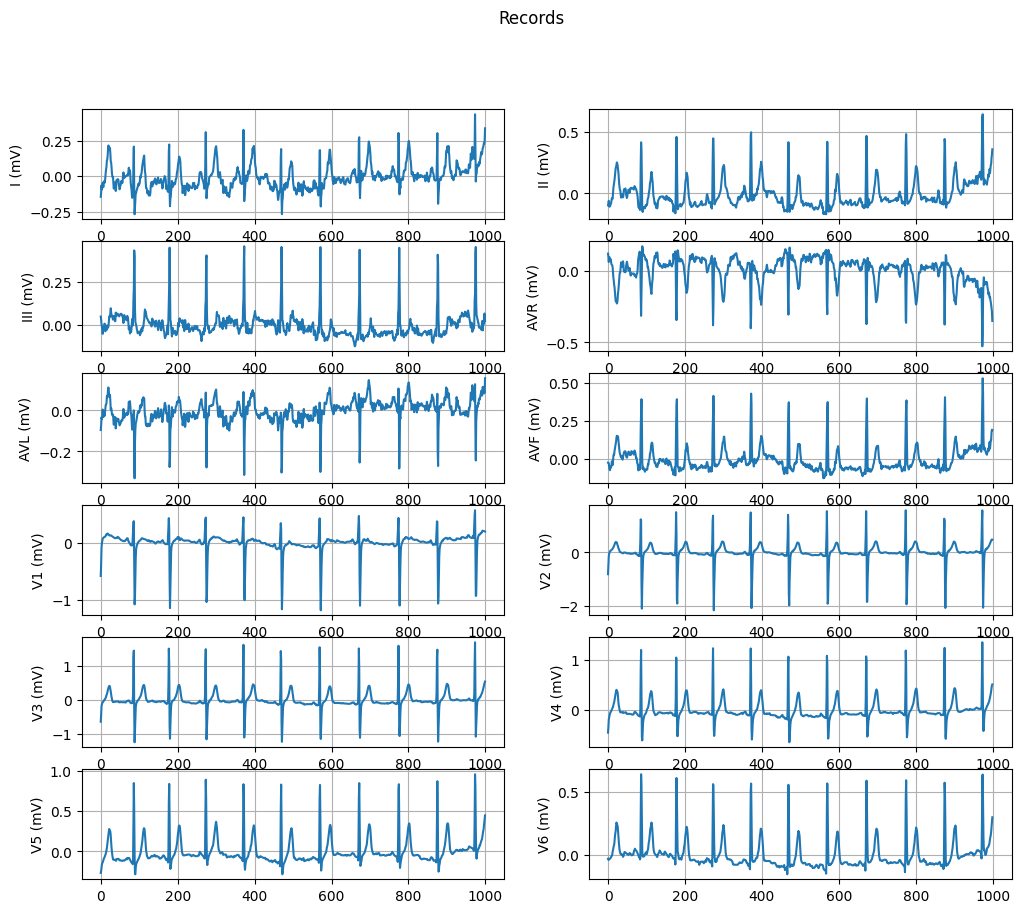

In [130]:
## Script to plot two records in an appropiate manner to read and analyse visually
import matplotlib.pyplot as plt
for signal in some_signals:
  fig, axs = plt.subplots(6,2, figsize=(12, 10))
  fig.suptitle('Records')
  i=0
  for  ax1 in axs:
    for ax in ax1:
      data_for_plot = signal[:,i]
      #print(data.shape)
      ax.plot(range(data_for_plot.shape[0]),data_for_plot)
      ax.set_ylabel(sig_names[i]+' (mV)')
      ax.grid()
      i = i + 1
plt.show()

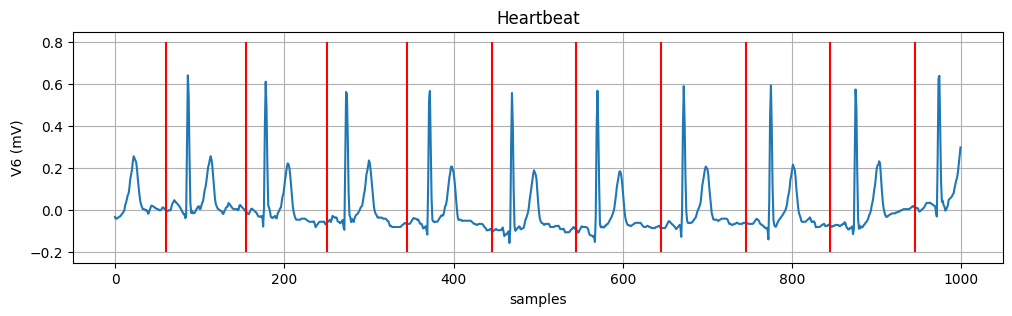

In [194]:
## The vertical lines delimit the start/end of a heartbeat
## The cardiac cycle of a typical heartbeat is represented by the P-QRS-T wave form 
ind_dforplot = 11
data_for_plot = signal[:,ind_dforplot]
fig, axs = plt.subplots(figsize = (12,3))
#print(data.shape)
plt.plot(data_for_plot)
plt.vlines(x = [60, 155, 250,345,445,545,645,745,845,945], ymin = -0.2, ymax = 0.8,
           colors = 'red')
plt.xlabel('samples')
plt.ylabel('V6 (mV)')
plt.title('Heartbeat')
plt.grid()
plt.show()

In [118]:
## The time stamps of the peaks of the R-wave  during the 10 seconds is
## recorded in the database
signal_r = ptbxl_ecg_database.r_peaks.iloc[ind_signals[-1]]
signal_r = signal_r[1:-1]
signal_r = np.asarray([int(r) for r in signal_r.split()])
signal_r

array([ 86, 178, 273, 372, 469, 570, 672, 775, 875, 974])

In [119]:
## The heart rate is the number of pulses/beats per minute
#  Heart rate = (nº of qrs in 6 seconds) x 10
# In this case it is 60 bpm

## However, to calculate the average heart beat:

average_sig_r = np.mean(np.diff(signal_r))  ## calculate the average time between two R peaks 
average_sig_sec = average_sig_r/100         ## I divide by 100 because is the frequency sample
average_heartbeat = 60 / average_sig_sec    
average_heartbeat

60.81081081081081

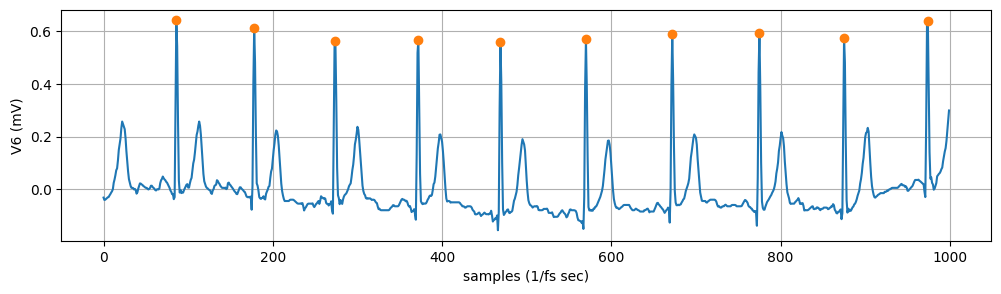

In [131]:
## Plot of the R peaks
fig, axs = plt.subplots(figsize = (12,3))
plt.plot(data_for_plot)
plt.plot(signal_r, data_for_plot[signal_r], 'o')
plt.xlabel('samples')
plt.ylabel('V6 (mV)')
plt.grid()
plt.show()

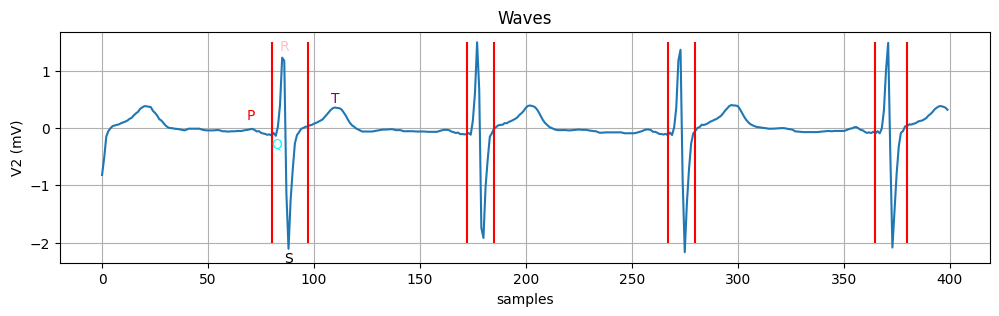

In [209]:
## The complex QRS is the activation of the ventricles during the heart beat

ind_dforplot = 7
data_for_plot = signal[:,ind_dforplot]
fig, axs = plt.subplots(figsize = (12,3))
# Plot the vertical lines that delimit the complex QRS
plt.plot(data_for_plot[0:400])
plt.vlines(x = [80, 97, 172, 185, 267, 280, 365, 380], ymin = -2, ymax = 1.5,
           colors = 'red')
plt.xlabel('samples')
plt.ylabel('V2 (mV)')
plt.text(68, 0.15, r'P', fontsize=10, color = 'red')
plt.text(80, -0.35, r'Q', fontsize=10, color = 'cyan')
plt.text(84, 1.35, r'R', fontsize=10, color = 'pink')
plt.text(86, -2.35, r'S', fontsize=10, color = 'k')
plt.text(108, 0.45, r'T', fontsize=10, color = 'purple')
plt.title('Waves')
plt.grid()
plt.show()